In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm 
import statistics 

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
sns.set_style('darkgrid')

# Variation

Recall that the mean of distribution was a measure of its center. The variance, on the other hand, is a measure of spread. To get a sense, the plot below shows a series of normal distributions at increasing variances.

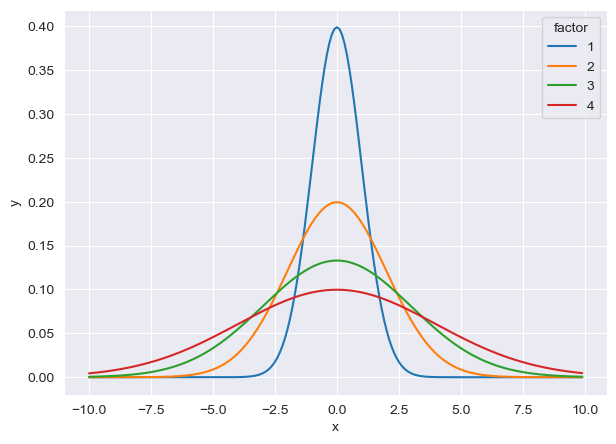

In [2]:
interval = np.arange(-10,10, 0.1)
mean = 0
stds = np.array([1,2,3,4])
df_plot = pd.DataFrame(columns=['x', 'y', 'factor'])

for std in stds:
    df_norm = pd.DataFrame({
        'x' : interval,
        'y' : norm.pdf(interval, mean, std),
        'factor' : str(std)
    })
    df_plot = pd.concat([df_plot, df_norm])    
    
rcParams["figure.figsize"] = (7,5)
sns.lineplot(
    data= df_plot,
    x = 'x',
    y = 'y',
    hue = 'factor'
);

We saw another example of how variances changed in the last chapter when we looked at the distribution of averages; they were always centered at the same spot as the original distribution, but are less spread out. Thus, it is less likely for sample means to be far away from the population mean than it is for individual observations. (This is why the sample mean is a better estimate than the population mean.)

If $X$ is a random variable with mean $\mu$, the variance of $X$ is defined as 

$$
Var(X) = E[(X-\mu)^{2}]= E[X^{2}]-E[X]^{2}
$$

The rightmost equation is the shortcut formula that is almost always used for calculating variances in practice.

Thus the variance is the expected (squared) distance from the mean. Densities with a higher variance are more spread out than densities with a lower variance. 
> The square root of the variance is called the standard deviation. 

The main benefit of working with standard deviations is that they have the same units as the data, whereas the variance has the units squared. In this class, we’ll only cover a few basic examples for calculating a variance. Otherwise, we’re going to use the ideas without the formalism. Also remember, what we’re talking about is the ***population variance***: it measures how spread out the population of interest is, unlike the ***sample variance*** which measures how spread out the observed data are. ***Just like the sample mean estimates the population mean, the sample variance will estimate the population variance.***

### Example

What’s the variance from the result of a toss of a die? First recall that $E[X] = 3.5$, as we discussed in the previous lecture. Then let’s calculate the other bit of information that we need, $E[X2]$.

$$
E[X^{2}] = 1^{2}\times\frac{1}{6} + 2^{2}\times\frac{1}{6} + 3^{2}\times\frac{1}{6} + 4^{2}\times\frac{1}{6} + 5^{2}\times\frac{1}{6} + 6^{2}\times\frac{1}{6} = 15.17
$$

Thus now we can calculate the variance as:

$$
Var(X) = E[X^{2}] - E[X]^{2} \approx 2.92
$$

### Example

What’s the variance from the result of the toss of a (potentially biased) coin with probability of heads (1) of $p$? First recall that $E[X] = 0 \times (1 − p) + 1 \times p = p$. Secondly, recall that since $X$ is either 0 or 1, $X^{2} = X$. So we know that:

$$
E[X^{2}]=E[X] = p
$$

Thus we can now calculate the variance of a coin flip as $Var(X) = E[X^{2}] − E[X]^{2} = p − p^{2} = p(1 − p)$. This is a well known formula, so it’s worth committing to memory. It’s interesting to note
that this function is maximized at $p = 0.5$. The plot below shows this by plotting $p(1 − p)$ by $p$

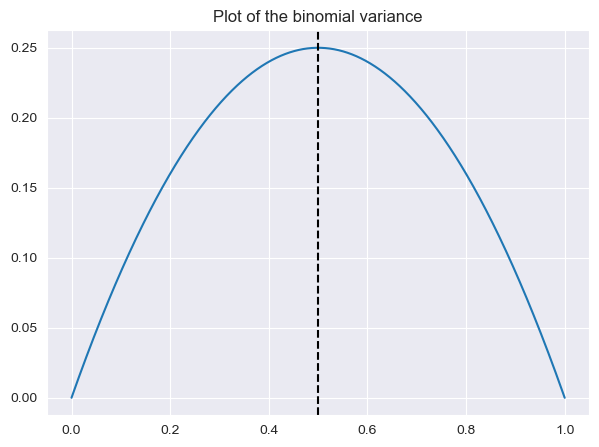

In [3]:
p = np.linspace(0,1,1000)
y = p*(1-p)
sns.lineplot(
    x = p,
    y = y
).set_title('Plot of the binomial variance')

plt.axvline(0.5, color = 'k', linestyle = '--')

## The Sample Variance

The sample variance is the estimator of the population variance. Recall that the population variance is the expected squared deviation around the population mean. The sample variance is (almost) the average squared deviation of observations around the sample mean. It is given by

$$
S^{2} = \frac{\sum_{i=1}(X_i - \bar{X})}{n-1}
$$

***The sample standard deviation is the square root of the sample variance***. Note again that the sample variance is almost, but not quite, the average squared deviation from the sample mean since we divide by $n − 1$ instead of $n$. Why do we do this you might ask? To answer that question we have to think in the terms of simulations. Remember that the sample variance is a random variable, thus it has a distribution and that distribution has an associated population mean. That mean is the population variance that we’re trying to estimate if we divide by $(n − 1)$ rather than $n$. It is also nice that as we collect more data the distribution of the sample variance gets more concentrated around the population variance that it’s estimating.

## Simulation experiments

### Simulating form a population with variance 1

Let’s try simulating collections of standard normals and taking the variance. If we repeat this over and over, we get a sense of the distribution of sample variances variances.

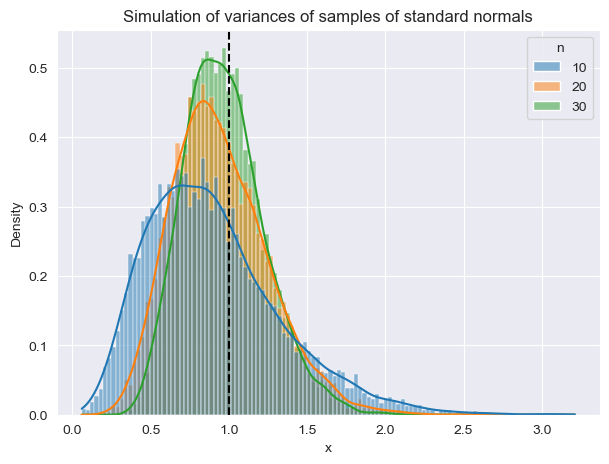

In [4]:
n_of_experiment = 10000
n_of_samples = [10,20,30]
loc = 0
scale = 1
variances = []

df_experiments = pd.DataFrame(columns=['x', 'n'])

for samples in n_of_samples:
    variances = []
    for i in np.arange(0, n_of_experiment):
        variances.append(np.random.normal(loc = loc,
                                         scale = scale,
                                         size = samples).var())
    df_experiments = pd.concat([df_experiments, pd.DataFrame({'x':np.array(variances),
                                                              'n':str(samples)})])
    
sns.histplot(
    data = df_experiments,
    x = 'x',
    hue = 'n',
    stat = 'density',
    kde = True
).set_title('Simulation of variances of samples of standard normals');

plt.axvline(1, color = 'k', linestyle = '--');

Notice that these histograms are always centered in the same spot, 1. In other words, the sample variance is an **unbiased estimate of the population variances**. Notice also that they get more concentrated around the 1 as more data goes into them. Thus, sample variances comprised of more observations are less variable than sample variances comprised of fewer.

## Variances of $x$ die rolls

Let’s try the same thing, now only with die rolls instead of simulating standard normals. In this experiment, we simulated samples of die rolls, took the variance and then repeated that process over and over. What is plotted are histograms of the collections of sample variances.

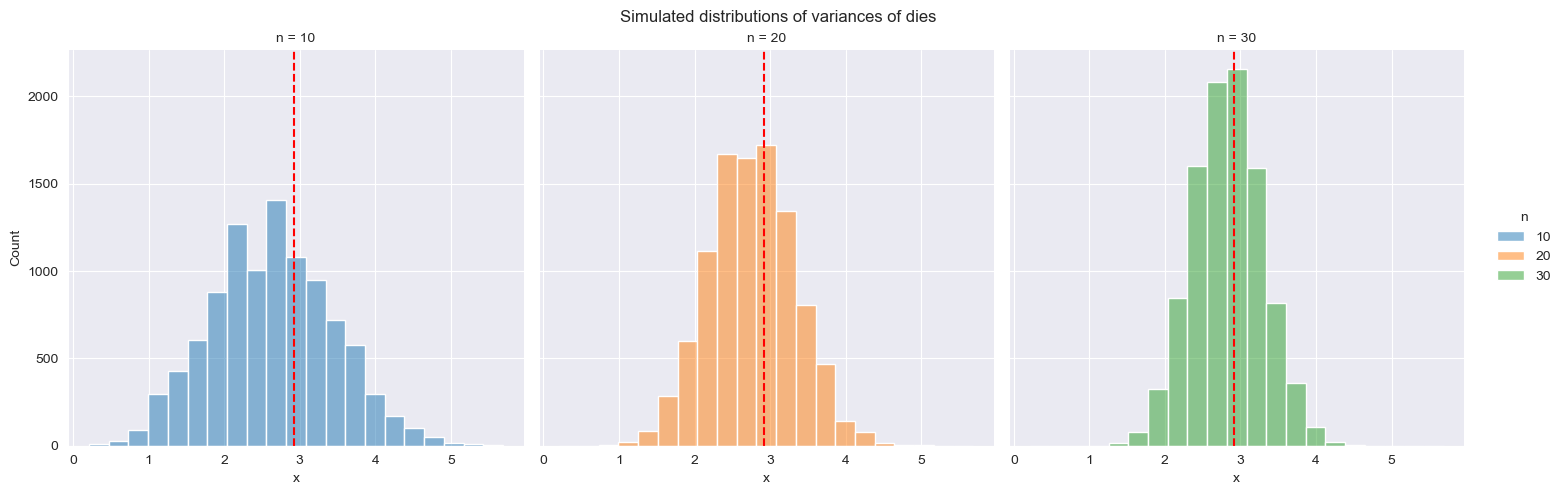

In [5]:
# https://stackoverflow.com/questions/66154773/how-to-add-individual-vlines-to-every-subplot-of-seaborn-facetgrid

n_of_experiment = 10000
n_of_dice = [10,20,30]
variances = []

df_experiments = pd.DataFrame(columns=['x', 'n'])

for die in n_of_dice:
    variances = []
    for i in np.arange(0, n_of_experiment):
        variances.append(np.random.choice(np.arange(1, 7),
                                          size = die,
                                          replace = True).var())
    df_experiments = pd.concat([df_experiments, pd.DataFrame({'x':np.array(variances),
                                                              'n':str(die)})])
    
plot = sns.displot(
    data = df_experiments,
    x = 'x',
    col = 'n',
    hue = 'n',
    bins=21,
);

plot.fig.subplots_adjust(top=0.9)
plot.fig.suptitle('Simulated distributions of variances of dies')

line_position = [2.92, 2.92, 2.92]
for ax, pos in zip(plot.axes.flat, line_position):
    ax.axvline(x=pos, color='r', linestyle='--')

Recall that we calculated the variance of a die roll as 2.92 earlier on in this chapter. Notice each of the histograms are centered there. In addition, they get more concentrated around 2.92 as more the variances are comprised of more dice.

## The standard error of the mean

At last, we finally get to a perhaps very surprising (and useful) fact: how to estimate the variability of the mean of a sample, when we only get to observe one realization. Recall that the average of random sample from a population is itself a random variable having a distribution, which in simulation settings we can explore by repeated sampling averages. We know that this distribution is centered around the population mean, $E[\bar{X}] = \mu$. We also know the variance of the distribution of means of random samples. 

The variance of the sample mean is: $Var(\bar{X}) = \sigma^{2}/n$ where $\sigma^{2}$ is the variance of the population being sampled from.

This is very useful, since we don’t have repeat sample means to get its variance directly using the data. We already know a good estimate of $\sigma^{2}$ via the sample variance. So, we can get a good estimate
of the variability of the mean, even though we only get to observe 1 mean.

Notice also this explains why in all of our simulation experiments the variance of the sample mean kept getting smaller as the sample size increased. This is because of the square root of the sample size in the denominator.

Often we take the square root of the variance of the mean to get the standard deviation of the mean. We call the standard deviation of a statistic its standard error.

## Summary notes

- The sample variance, $S^{2}$, estimates the population variance, $\sigma^{2}$.
- The distribution of the sample variance is centered around $\sigma^{2}$.
- The variance of the sample mean is $\sigma^{2}/n$.
    - Its logical estimate is $s^{2}/n$.
    - The logical estimate of the standard error is $S/\sqrt{n}$.
- $S$, the standard deviation, talks about how variable the population is.
- $S/\sqrt{n}$, the standard error, talks about how variable averages of random samples of size $n$ #from the population are.

## Simulation example 1: standard normals

Standard normals have variance 1. Let’s try sampling means of $n$ standard normals. If our theory is correct, they should have standard deviation $1/\sqrt{n}$ 

In [6]:
nsim = 1000
n = 10
std_dev = 1
np.random.seed(1)

# simulate nosim averages of 10 standard normals
df_draws = pd.DataFrame(np.random.normal(loc = 0,
                                         scale = std_dev,
                                         size = (n, nsim)))

print(np.round(np.std(df_draws.mean()),5));

# let's check to make sure that this is sigma/sqrt(n)
print(np.round(std_dev/np.sqrt(n), 5))

0.31244
0.31623


So, in this simulation, we simulated 1000 means of 10 standard normals. Our theory says the standard deviation of averages of 10 standard normals must be $1/\sqrt{n}$. Taking the standard deviation of the 10000 means yields nearly exactly that. (Note that it’s only close, 0.31244 versus 0.31632. To get it to be exact, we’d have to simulate infinitely many means.)

## Simulation example 2: uniform density

Standard uniforms have variance of $1/12$. Our theory mandates that means of random samples of $n$ uniforms have standard deviation of $1/\sqrt{12 \times n}$. Let’s try it with a simulation.

In [7]:
np.random.seed(1)

n = 10
n_sim = 1000
draws = []

for i in np.arange(0,n_sim):
    draws.append(np.array(np.random.uniform(size =n)).mean())
    
print("standard deviation of {} random samples mean = {}".format(n, np.round(np.array(draws).std(), 4)))
print("theoretical standard deviation = {}".format(np.round(1/np.sqrt(12*n), 4)))

standard deviation of 10 random samples mean = 0.092
theoretical standard deviation = 0.0913


## Simulation example 3: Poisson

In the next example, we will examine poisson random variables with variance $k$. Thus means of random samples of $n$ Poissons should have a standard deviation $\sqrt{k}/\sqrt{n}$. Again, let's try it out.

In [8]:
np.random.seed(1)

n = 10
n_sim = 1000
draws = []
k = 4

for i in np.arange(0,n_sim):
    draws.append(np.array(np.random.poisson(k, size =n)).mean())
    
print("standard deviation of {} random samples mean = {}".format(n, np.round(np.array(draws).std(), 4)))
print("theoretical standard deviation = {}".format(np.round(np.sqrt(k)/np.sqrt(n), 4)))

standard deviation of 10 random samples mean = 0.6477
theoretical standard deviation = 0.6325


## Simulation example 4: coin flip

Our last example is an important one. Recall that the variance of a coin flip is $p(1-p)$. Therefore the standard deviation of the averages of $n$ coin flips shoud be:

$$
\sqrt{\frac{p(1-p)}{n}}
$$

Let's just do the simulation with a fair coin. Such coin flips have variance $0.25$. Thus means of random samples of $n$ coin flips have standard deviation $1/2\sqrt{n}$. Let's try it.

In [9]:
np.random.seed(1)

n = 10
n_sim = 1000
means = []

for i in np.arange(0,n_sim):
    means.append(np.random.choice(np.arange(0, 2),
                                  size = n,
                                  replace = True).mean())

print("standard deviation of {} random samples mean = {}".format(n, np.round(np.array(means).std(), 4)))
print("theoretical standard deviation = {}".format(np.round(1/(2*np.sqrt(n)), 4)))

standard deviation of 10 random samples mean = 0.1604
theoretical standard deviation = 0.1581


## Data example

Now let’s work through a data example to show how the standard error of the mean is used in practice. We’ll use the data from Francis Galton father and sons height.

In [10]:
# Loading the data
import rdata

parsed = rdata.parser.parse_file('./data/father.son.rda')
converted = rdata.conversion.convert(parsed)
df_galton = converted['father.son'].rename(columns={'fheight' : 'parents',
                                                   'sheight' : 'child'})

Here's a histogram of the sons' heights from the dataset. Let's calculate different variances and interpret them in this context

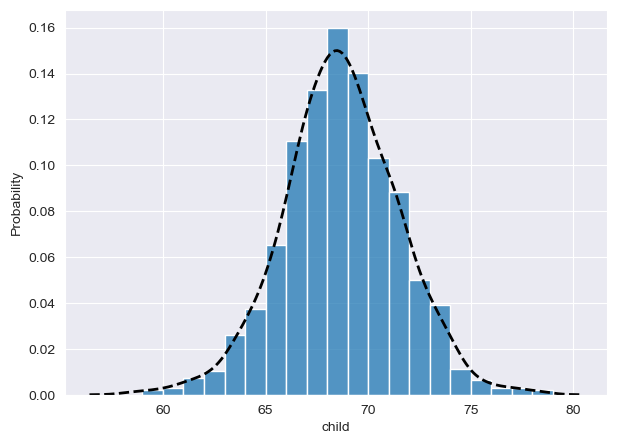

In [11]:
g = sns.histplot(
    df_galton['child'],
    binwidth=1,
    binrange=(59,80),
    stat = "probability",
#    kde = True,
);

# g.lines[0].set_color('k')
sns.kdeplot(x=df_galton['child'], 
            color='k',
            linewidth = 2,
            linestyle = '--',
            ax=g);

In [12]:
var_child = df_galton['child'].var()
sd_child = df_galton['child'].std()
n = df_galton.shape[0]

print(" Children heights var = {} \n var/{} = {} \n Children heights sd = {} \n sd/{} = {}".format(np.round(var_child, 2),
                                                                                                   n, np.round(var_child/n, 2),
                                                                                                   np.round(sd_child, 2),
                                                                                                   n, np.round(sd_child/np.sqrt(n), 2))
     )

 Children heights var = 7.92 
 var/1078 = 0.01 
 Children heights sd = 2.81 
 sd/1078 = 0.09


The first number, 7.92, and its square root, 2.81, are the estimated variance and standard deviation of the sons’ heights. Therefore, 7.92 tells us exactly how variable sons’ heights were in the data and estimates how variable sons’ heights are in the population. In contrast 0.01, and the square root 0.09, estimate how variable averages of $n$ sons’ heights are. Therefore, the smaller numbers discuss the precision of our estimate of the mean of sons’ heights. The larger numbers discuss how variable sons’ heights are in general.

## Summary notes

- The sample variance estimates the population variance.
- The distribution of the sample variance is centered at what its estimating.
- It gets more concentrated around the population variance with larger sample sizes.
- The variance of the sample mean is the population variance divided by n.
- The square root is the standard error.
- It turns out that we can say a lot about the distribution of averages from random samples, even though we only get one to look at in a given data set.